<center>
<h2>Master en fouille de données et intelligence artificielle</h2>
    <h3>Projet pour la validation du module ML-Apprentissage Supervisé et Feature engineering</h3>
</center>

Un test de classification de bout en bout
Comme dernière étape, vous recevez un ensemble de données appelé data/ccdefault.csv. L'ensemble de données représente le défaut des clients des cartes de crédit. Il a 30 000 cas et 24 attributs différents. Plus de détails sur l'ensemble de données sont disponibles sur data/ccdefault.txt. Dans cette tâche, vous devez créer trois modèles, comparer leurs résultats et trouver la solution idéale. Voici les étapes suggérées :
1.	Chargez les données.
2.	Effectuez des analyses exploratoires (par exemple, comment les diverses caractéristiques et la variable cible sont distribuées).
3.	Entraînez un modèle pour prédire la variable cible (risque de "par défaut").
○	Utiliser trois modèles différents (régression logistique, arbre de décision et forêt aléatoire).
	○	Comparer les performances des modèles (par exemple, AUC).
○	Défendre votre choix du meilleur modèle (par exemple, quelles sont les forces et les faiblesses de chacun de ces modèles ?).
4.	Que feriez-vous de plus avec ces données ? Quelque chose pour vous aider à trouver une meilleure solution ?
5.	Mettre votre solution sur github et m'envoyez le lien.
6.	Possibilit

In [69]:
# Importation des librairies
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
pd.options.mode.chained_assignment = None  # default='warn'
from ipykernel import kernelapp as app
import os
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

1. Changement de données

In [17]:
path='C:/Users/hp/Documents/Formation_Python/ML/data/'
data = pd.read_csv(path+'ccdefault.csv')

2. Analyses exploratoires

In [18]:
data
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [19]:
# Affichage des dimensions de la base de données
print(f'La base de données contient {data.shape[0]} cas et {data.shape[1]} variables ou attributs')

La base de données contient 30000 cas et 25 variables ou attributs


In [39]:
#information sur les variables 
print(data.info()) 
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [21]:
# Description des observations
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Labélisation

In [22]:
data['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [23]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [24]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [25]:
data['AGE'].median()

34.0

In [43]:
#vérifier la distribution absolue des classes 
print(data.DEFAULT.value_counts()) 

0    23364
1     6636
Name: DEFAULT, dtype: int64


In [44]:
#la distribution relative 
print(data.DEFAULT.value_counts(normalize=True)) 

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64


3.	Entraînez un modèle pour prédire la variable cible (risque de "par défaut").
○	Utiliser trois modèles différents (régression logistique, arbre de décision et forêt aléatoire).
○	Comparer les performances des modèles (par exemple, AUC).
○	Défendre votre choix du meilleur modèle (par exemple, quelles sont les forces et les faiblesses de chacun de ces modèles ?).

# a. Régression logistique

In [64]:
nom_default_cible = dict( zip (data.DEFAULT.unique(), data.ID.unique()))
print( nom_default_cible )

#valeurs caractéristiques et valeur cible
y = data["DEFAULT"]
x = data.drop("DEFAULT", axis = 1)
#x = data [['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
#y = data ['DEFAULT']
#fractionner dataset
#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.25, random_state=42)
#instanciation du modèle
modele_regLog = linear_model.LogisticRegression(random_state = 0,
solver = 'liblinear', multi_class = 'auto')
#training
modele_regLog.fit(x_train,y_train)
#précision du modèle
precision = modele_regLog.score(x_test,y_test)
print(precision*100)

{1: 1, 0: 2}
78.30666666666667


In [34]:
#prédiction
prediction_default = modele_regLog.predict([[100000,1,2,2,56,1,1,0,-2,1,2,1000,1000,1000,1500,1000,1000,1,1,0,-2,1,2]])
nom_default_cible[prediction_default[0]]

2

In [36]:
#prédiction
prediction_default = modele_regLog.predict([[1000,1,2,4,25,1,0,0,1,1,2,1500,100,2000,1500,1000,15000,1,1,0,-2,1,2]])
nom_default_cible[prediction_default[0]]

2

# Avantages et limites du modèle de regression logistique

## Avantages

La régression logistique est un algorithme de classification simple et efficace, alors il ne nécessite pas une grande puissance de calcul et il est facile à mettre en œuvre. Ce modèle d’apprentissage est largement utilisé par les analystes de données et les scientifiques et il ne nécessite pas de mise à l’échelle des fonctionnalités.

Enfin, la régression logistique fournit un score de probabilité pour les observations.

## Limites

La régression logistique n’est pas adaptée à un  grand nombre de caractéristiques. Cet algorithme ne peut pas résoudre le problème de non-linéarité ce qui nécessite la transformation des caractéristiques non linéaires.

Ainsi, la régression logistique ne fonctionne pas bien avec des variables indépendantes qui ne sont pas corrélées à la variable cible et qui sont très similaires entre elles.

# b. arbre de décision 

In [49]:
dataTrain, dataTest = train_test_split(data,test_size=12876,random_state=1,stratify=data.DEFAULT)

In [50]:
print(dataTrain.shape) #(17124, 25) 
print(dataTest.shape) #(12876, 25) 

(17124, 25)
(12876, 25)


In [51]:
#vérification des distributions en apprentissage 
print(dataTrain.DEFAULT.value_counts(normalize=True)) 

0    0.77879
1    0.22121
Name: DEFAULT, dtype: float64


In [52]:
#vérification des distributions en apprentissage 
print(dataTest.DEFAULT.value_counts(normalize=True)) 

0    0.778813
1    0.221187
Name: DEFAULT, dtype: float64


In [53]:
#instanciation de l'arbre 
from sklearn.tree import DecisionTreeClassifier 
arbreFirst = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10) 

In [54]:
#construction de l'arbre 
arbreFirst.fit(X = dataTrain.iloc[:,:-1], y = dataTrain.DEFAULT)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=30)

[Text(255.14358809782078, 213.55714285714285, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 17124\nvalue = [13336, 3788]'),
 Text(199.83547572762285, 205.79142857142858, 'PAY_2 <= 1.5\ngini = 0.276\nsamples = 15332\nvalue = [12796, 2536]'),
 Text(125.56324474697739, 198.0257142857143, 'PAY_AMT3 <= 661.5\ngini = 0.245\nsamples = 14062\nvalue = [12051, 2011]'),
 Text(40.519200468018724, 190.26, 'BILL_AMT1 <= 116.0\ngini = 0.339\nsamples = 3879\nvalue = [3041, 838]'),
 Text(21.471248049921996, 182.4942857142857, 'PAY_AMT4 <= 1.5\ngini = 0.414\nsamples = 1092\nvalue = [772, 320]'),
 Text(18.56808112324493, 174.72857142857143, 'AGE <= 55.5\ngini = 0.436\nsamples = 818\nvalue = [555, 263]'),
 Text(17.453822152886115, 166.96285714285713, 'EDUCATION <= 3.5\ngini = 0.428\nsamples = 788\nvalue = [543, 245]'),
 Text(16.89669266770671, 159.19714285714286, 'PAY_AMT5 <= 3054.5\ngini = 0.434\nsamples = 771\nvalue = [526, 245]'),
 Text(14.850982839313573, 151.43142857142857, 'BILL_AMT5 <= 6.0\ngini = 0.44\ns

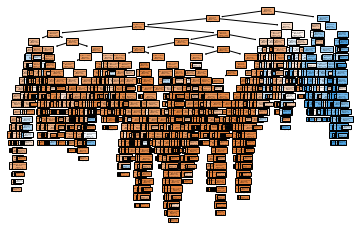

In [55]:
#affichage graphique de l'arbre - depuis sklearn 0.21 
from sklearn.tree import plot_tree 
plot_tree(arbreFirst,feature_names = list(data.columns[:-1]),filled=True)

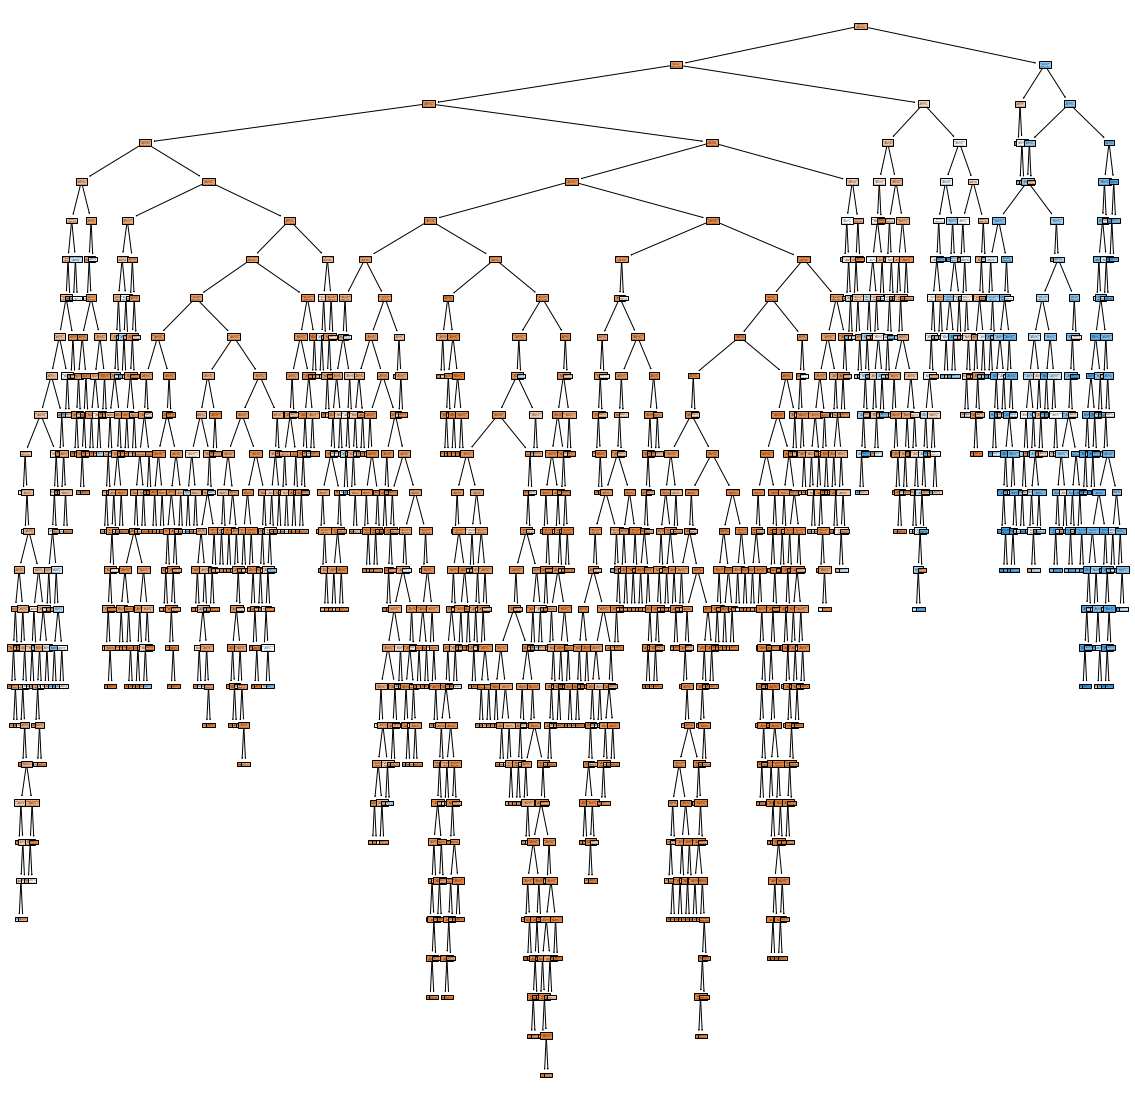

In [57]:
#affichage plus grand pour une meilleure lisibilité 
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,20)) 
plot_tree(arbreFirst,feature_names = list(data.columns[:-1]),filled=True) 
plt.show()

In [58]:
#affichage sous forme de règles 
#plus facile à appréhender quand l'arbre est très grand 
from sklearn.tree import export_text 
tree_rules = export_text(arbreFirst,feature_names = list(data.columns[:-1]),show_weights=True)

In [61]:
#importance des variables 
impVarFirst={"Variable":data.columns[:-1],"Importance":arbreFirst.feature_importances_} 
print(pd.DataFrame(impVarFirst).sort_values(by="Importance",ascending=False))

     Variable  Importance
6       PAY_0    0.365805
7       PAY_2    0.068560
20   PAY_AMT3    0.053598
1   LIMIT_BAL    0.051939
12  BILL_AMT1    0.051434
0          ID    0.050502
5         AGE    0.037469
19   PAY_AMT2    0.035909
18   PAY_AMT1    0.033383
22   PAY_AMT5    0.033083
17  BILL_AMT6    0.028161
16  BILL_AMT5    0.026598
13  BILL_AMT2    0.024622
21   PAY_AMT4    0.023266
14  BILL_AMT3    0.023066
15  BILL_AMT4    0.023058
9       PAY_4    0.017498
23   PAY_AMT6    0.014812
8       PAY_3    0.011274
3   EDUCATION    0.008652
11      PAY_6    0.006283
2         SEX    0.004175
10      PAY_5    0.003779
4    MARRIAGE    0.003073


In [62]:
#prédiction sur l'échantillon test 
predFirst = arbreFirst.predict(X=dataTest.iloc[:,:-1]) 
 
#distribution des predictions 
import numpy 
print(numpy.unique(predFirst,return_counts=True))

(array([0, 1], dtype=int64), array([10927,  1949], dtype=int64))


# c. forêt aléatoire

In [67]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.25, random_state=42)

In [70]:
modele_rf = RandomForestClassifier(
     n_estimators=100,
     criterion='gini',
     max_depth=None,
     min_samples_split=2,
     min_samples_leaf=1,
     min_weight_fraction_leaf=0.0,
     max_features='auto',
     max_leaf_nodes=None,
     min_impurity_decrease=0.0,
     bootstrap=True,
     oob_score=False,
     n_jobs=None,
     random_state=None,
     verbose=0,
     warm_start=False,
     class_weight=None,
     ccp_alpha=0.0,
     max_samples=None,)

In [71]:
modele_rf.fit(x_train, y_train)

RandomForestClassifier()

In [73]:
pd.DataFrame(modele_rf.feature_importances_,
              index = x_train.columns, 
              columns = ["importance"]).sort_values(
     "importance", 
     ascending = False)

,importance
PAY_0,0.094858
ID,0.070736
AGE,0.056651
BILL_AMT1,0.055381
LIMIT_BAL,0.051326
BILL_AMT2,0.049641
BILL_AMT3,0.047259
PAY_AMT1,0.047197
PAY_2,0.046589
BILL_AMT6,0.046286


In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(f"Ce indicateur mesure le nombre de clients ayant de cartes de crédit avec defaut dans notre échantillon. On voit qu'on a : {accuracy_score(y_test, modele_rf.predict(x_test))*100} % de cartes de credit sans defaut, ce qui traduit une bonne qualité predictive de notre modèle")

Ce indicateur mesure le nombre de clients ayant de cartes de crédit avec defaut dans notre échantillon. On voit qu'on a : 81.58666666666666 % de cartes de credit sans defaut, ce qui traduit une bonne qualité predictive de notre modèle


In [78]:
pd.DataFrame(confusion_matrix(y_test, modele_rf.predict(x_test)),
             index = ["defaut_Oui", "defaut_Non"],
             columns = ["Oui_predit", "Non_predit"])

,Oui_predit,Non_predit
defaut_Oui,5543,330
defaut_Non,1051,576
